The Fourier series representation of a periodic function $f(x)$ with period $T$ is given by:
$$
    f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left( a_n \cos \left( \frac{2 \pi n x}{T} \right) + b_n \sin \left( \frac{2 \pi n x}{T} \right) \right)
$$
where $a_0$, $a_n$, and $b_n$ are the Fourier coefficients, calculated as follows:
$$
    a_0 = \frac{1}{T} \int_{0}^{T} f(x) \, dx \\
    $$
    $$
    a_n = \frac{2}{T} \int_{0}^{T} f(x) \cos \left( \frac{2 \pi n x}{T} \right) \, dx \\
    $$
    $$
    b_n = \frac{2}{T} \int_{0}^{T} f(x) \sin \left( \frac{2 \pi n x}{T} \right) \, dx
$$

In [225]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
 

In [226]:
def Square_Wave(x):
    g=np.zeros(len(x))
    L=x[-1]-x[0]
    for i in range(len(x)):
        if x[i] < L/2:
            g[i]=1
        else :
            g[i]=-1
    return g

In [241]:
def Triangle_Wave(x):
    g=np.zeros(len(x))
    L=x[-1]-x[0]
    for i in range(len(x)):
        if x[i] < L/4:
            g[i]=x[i]
        elif x[i]>L/4 and x[i]<3*L/4:
            g[i]= L/2-x[i]
        else :
            g[i]=x[i]-L
    return g

In [242]:
def I (x,f):
    h=x[1]-x[0]
    return h/2*(2*sum(f)-f[0]-f[-1])

In [243]:
def Fourier_Series(x,g,N):
    L=x[-1]-x[0]

    
    a0=I(x,g)/L
    
    an=np.zeros(N)
    bn=np.zeros(N)
    
    h=a0/2
    
    for i in range (N):
        
        an[i]= 2/L*I(x,(g*np.cos(2*np.pi*(i+1)*x/L)))
        bn[i]= 2/L*I(x, (g*np.sin(2*np.pi*(i+1)*x/L)))

        h=h +an[i]*np.cos(2*np.pi*(i+1)*x/L)+bn[i]*np.sin(2*np.pi*(i+1)*x/L)
    return h,an, bn

In [249]:
t=np.linspace(0,1,1000)
fn=Triangle_Wave(2*np.pi*t)
fs,An, Bn=Fourier_Series(t,fn,25)

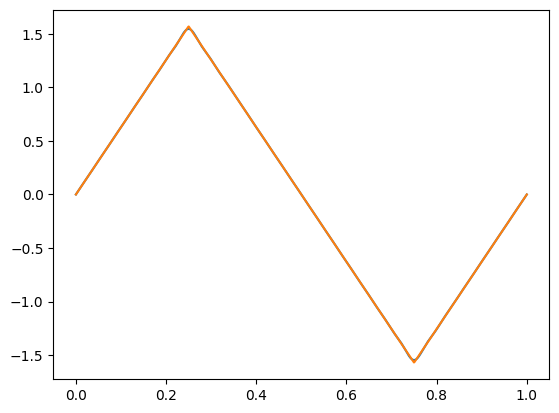

In [250]:
plt.plot(t,fs)
plt.plot(t,fn)

In [219]:
sq=Square_Wave(2*np.pi*t)
fsq=FS(t,sq,30)

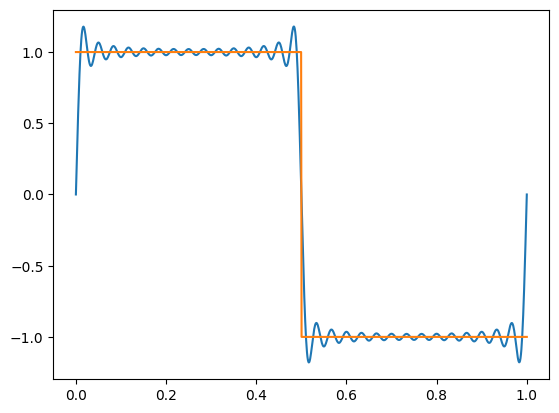

In [220]:
plt.plot(t,fsq)
plt.plot(t,sq)

In [253]:
SQ=sp.signal.square(2*np.pi*t)
FSQ, An, Bn=Fourier_Series(t,SQ,40)

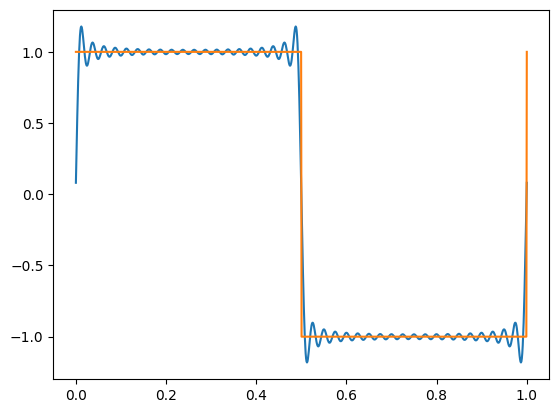

In [254]:
plt.plot(t,FSQ)
plt.plot(t,SQ)